In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

!pip install lasio
import lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 518.9 kB/s eta 0:00:00


In [ ]:
# Clone repository
!git clone https://github.com/yohanesnuwara/formation-evaluation

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 202 (delta 44), reused 37 (delta 37), pack-reused 147 (from 1)
Receiving objects: 100% (202/202), 13.68 MiB | 18.57 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [ ]:
# Import libraries
# Update the path
import sys
sys.path.append('/content/formation-evaluation')

from triple_combo import *
from ND_plot import *
from well_log_display import *
from label_generator import *

## 3a. Read well log data

In [ ]:
filepath = '/content/formation-evaluation/data/volve/15_9-F-11A.LAS'

# read with lasio
volve = lasio.read(filepath)

In [ ]:
# Print the header
volve.well

[HeaderItem(mnemonic="STRT", unit="M", value="188.5", descr="START"),
 HeaderItem(mnemonic="STOP", unit="M", value="3761.9", descr="STOP"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.1", descr="STEP"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="Statoil Petroleum AS", descr="Comp"),
 HeaderItem(mnemonic="WELL", unit="", value="15/9-F-11 A", descr="Well"),
 HeaderItem(mnemonic="FLD", unit="", value="VOLVE", descr="Field"),
 HeaderItem(mnemonic="LOC", unit="", value="Maersk Inspirer", descr="Location"),
 HeaderItem(mnemonic="PROV", unit="", value="", descr="Province"),
 HeaderItem(mnemonic="CNTY", unit="", value="", descr="County"),
 HeaderItem(mnemonic="STATE", unit="", value="", descr="State"),
 HeaderItem(mnemonic="CTRY", unit="", value="Norway", descr="Country"),
 HeaderItem(mnemonic="DATE", unit="", value="", descr="Log Date"),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr="Service Company"),
 

In [ ]:
# Available logs
volve.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35735,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35735,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

In [ ]:
volve.keys()

['DEPTH',
 'ABDCQF01',
 'ABDCQF02',
 'ABDCQF03',
 'ABDCQF04',
 'BS',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'NPHI',
 'PEF',
 'RACEHM',
 'RACELM',
 'RD',
 'RHOB',
 'RM',
 'ROP',
 'RPCEHM',
 'RPCELM',
 'RT']

In [ ]:
# Convert to dataframe to open the data
well = volve.df().reset_index()

well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.738,NaN,NaN,NaN
35731,3761.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.751,NaN,NaN,NaN
35732,3761.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.764,NaN,NaN,NaN
35733,3761.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.757,NaN,NaN,NaN


<Axes: >

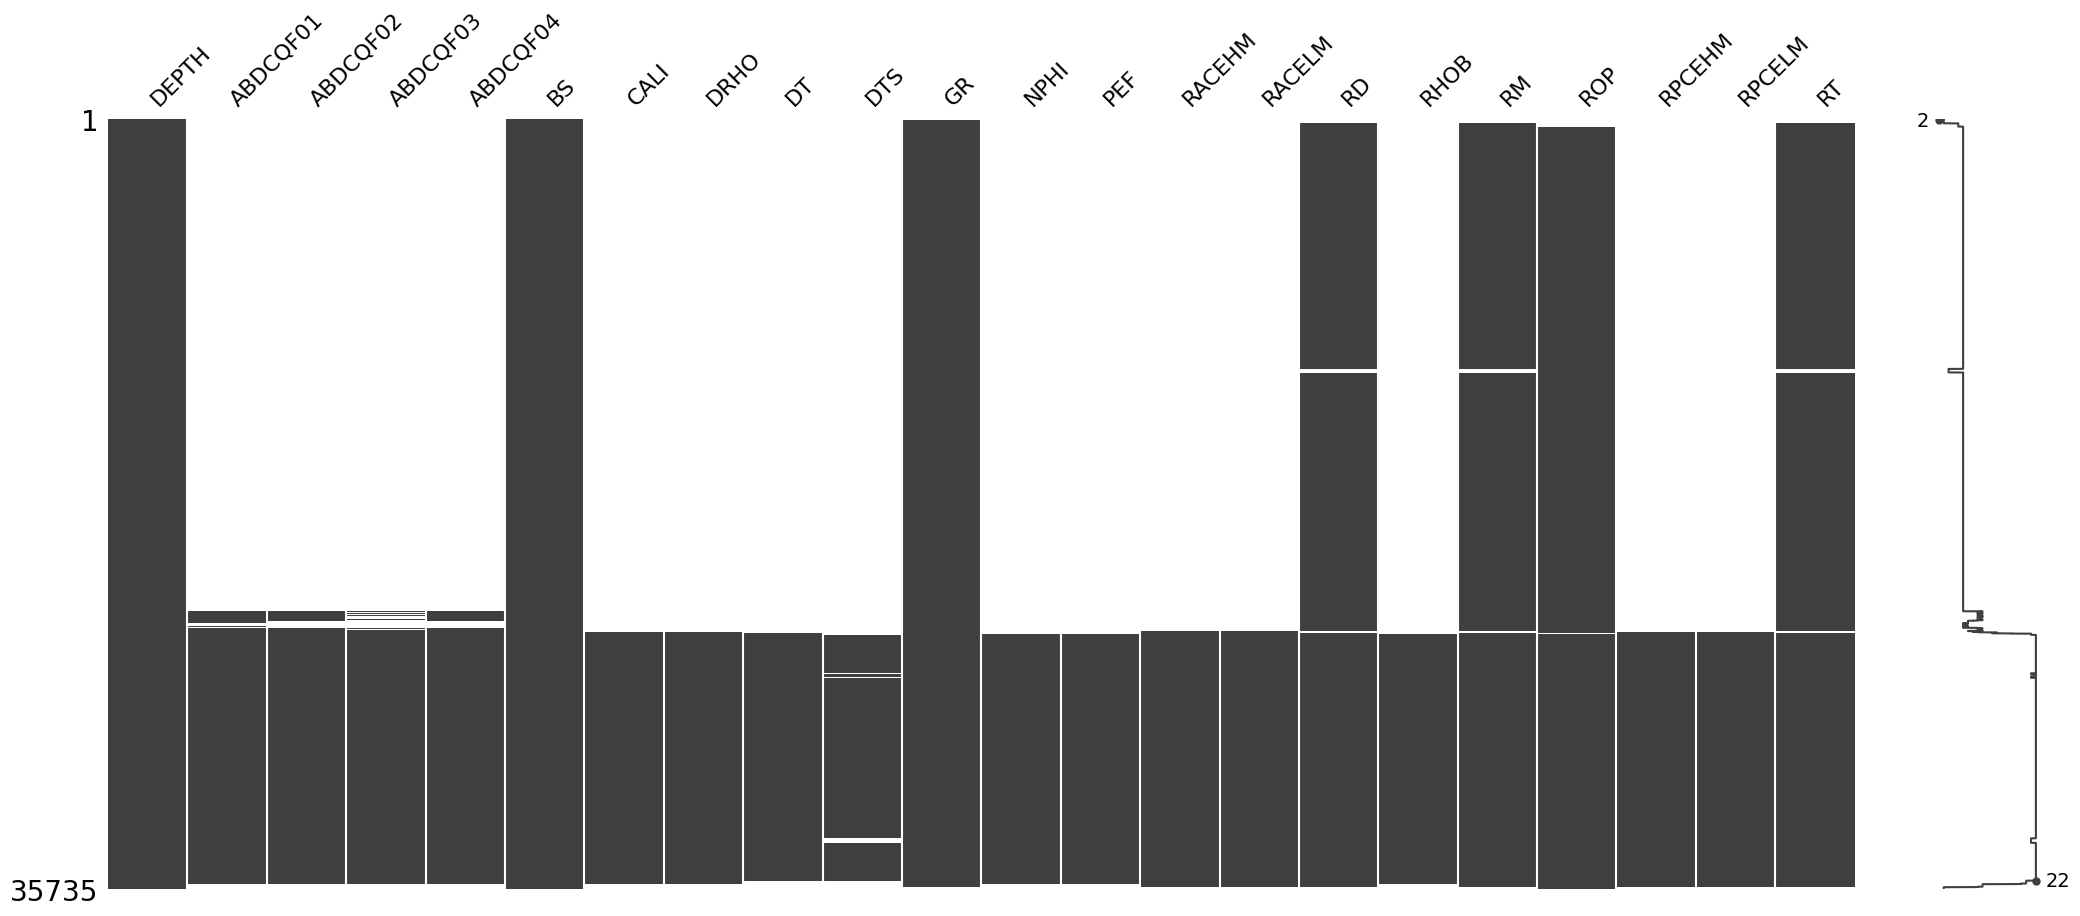

In [ ]:
# Inspect missing values
import missingno as msno
msno.matrix(well)

In [ ]:
# Print summary statistics
well.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPTH,35735.0,1975.200000,1031.595027,188.500,1081.85000,1975.2000,2868.55000,3761.900
ABDCQF01,12468.0,2.443634,0.222820,-6.361,2.28300,2.5150,2.57600,3.041
ABDCQF02,12333.0,2.449720,0.176771,1.637,2.28700,2.5240,2.58300,3.052
ABDCQF03,11896.0,2.459189,0.180817,1.318,2.31300,2.5320,2.58600,3.116
ABDCQF04,12325.0,2.438176,0.196487,1.032,2.28200,2.5190,2.57900,3.030
BS,35735.0,17.360989,7.222913,8.500,8.50000,17.5000,26.00000,36.000
CALI,11681.0,8.633658,0.052675,7.993,8.62500,8.6250,8.67200,9.132
DRHO,11688.0,0.057584,0.011778,-0.152,0.05300,0.0590,0.06300,0.182
DT,11475.0,77.764135,15.573635,53.165,66.19800,71.5940,87.71800,126.827
DTS,11084.0,145.334233,44.377235,83.574,119.45200,129.9030,145.49550,343.944


In [ ]:
# print the column
well['DEPTH']

,DEPTH
0,188.5
1,188.6
2,188.7
3,188.8
4,188.9
...,...
35730,3761.5
35731,3761.6
35732,3761.7
35733,3761.8


In [ ]:
well.columns

Index(['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI',
       'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD',
       'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT'],
      dtype='object')

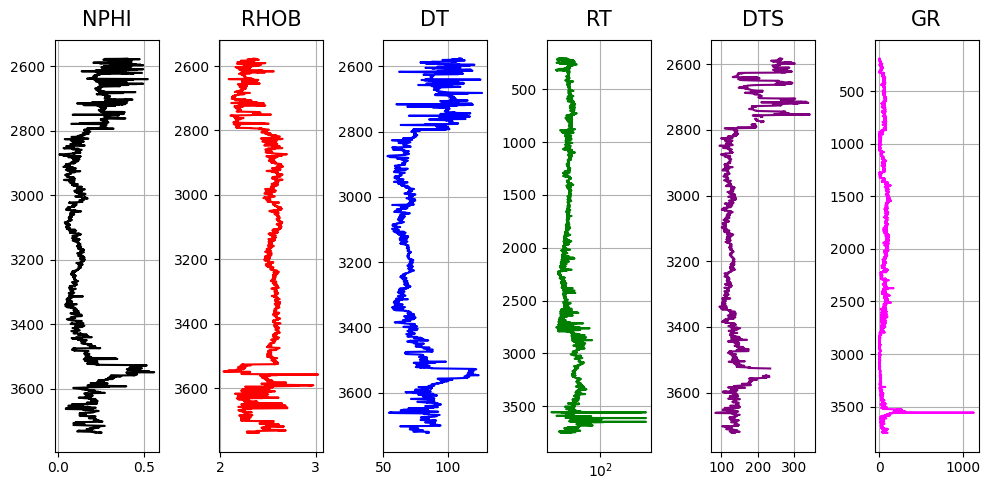

In [ ]:
# Visualize
logs = ['NPHI', 'RHOB', 'DT', 'RT', 'DTS', 'GR']
colors = ['black', 'red', 'blue', 'green', 'purple', 'magenta']

plt.figure(figsize=(10,5))
for i in range(len(logs)):
  plt.subplot(1,6,i+1)
  plt.plot(well[logs[i]], well['DEPTH'], color=colors[i])
  plt.grid()

  # Make an exception for resistivity (RT) to change into log axis
  if i==3:
    plt.xscale('log')

  plt.title(logs[i], size=15, pad=10)
  plt.gca().invert_yaxis() # Reverse y axis

plt.tight_layout()
plt.show()

## 3b Log visualization and formation tops

In [ ]:
filepath = '/content/formation-evaluation/data/volve/Fmtops_15_9-F-11A.csv'
tops = pd.read_csv(filepath, encoding = "ISO-8859-1")

tops.tail(10)

,PICKS,DEPTH
0,HORDALAND GP. Top,2600.0
1,Ty Fm. Top,2624.0
2,Ekofisk Fm. Top,2794.5
3,Hod Fm. Top,3118.0
4,Draupne Fm. Top,3525.8
5,Heather Fm. Top,3574.9
6,Heather Fm. Sand VOLVE Top,3585.2
7,Hugin Fm. VOLVE Top,3594.6
8,Sleipner Fm. Top,3702.0


In [ ]:
# make list of formation tops and depths
fm_tops = list(tops.iloc[:,0].values)
fm_depths = list(tops.iloc[:,-1].values)

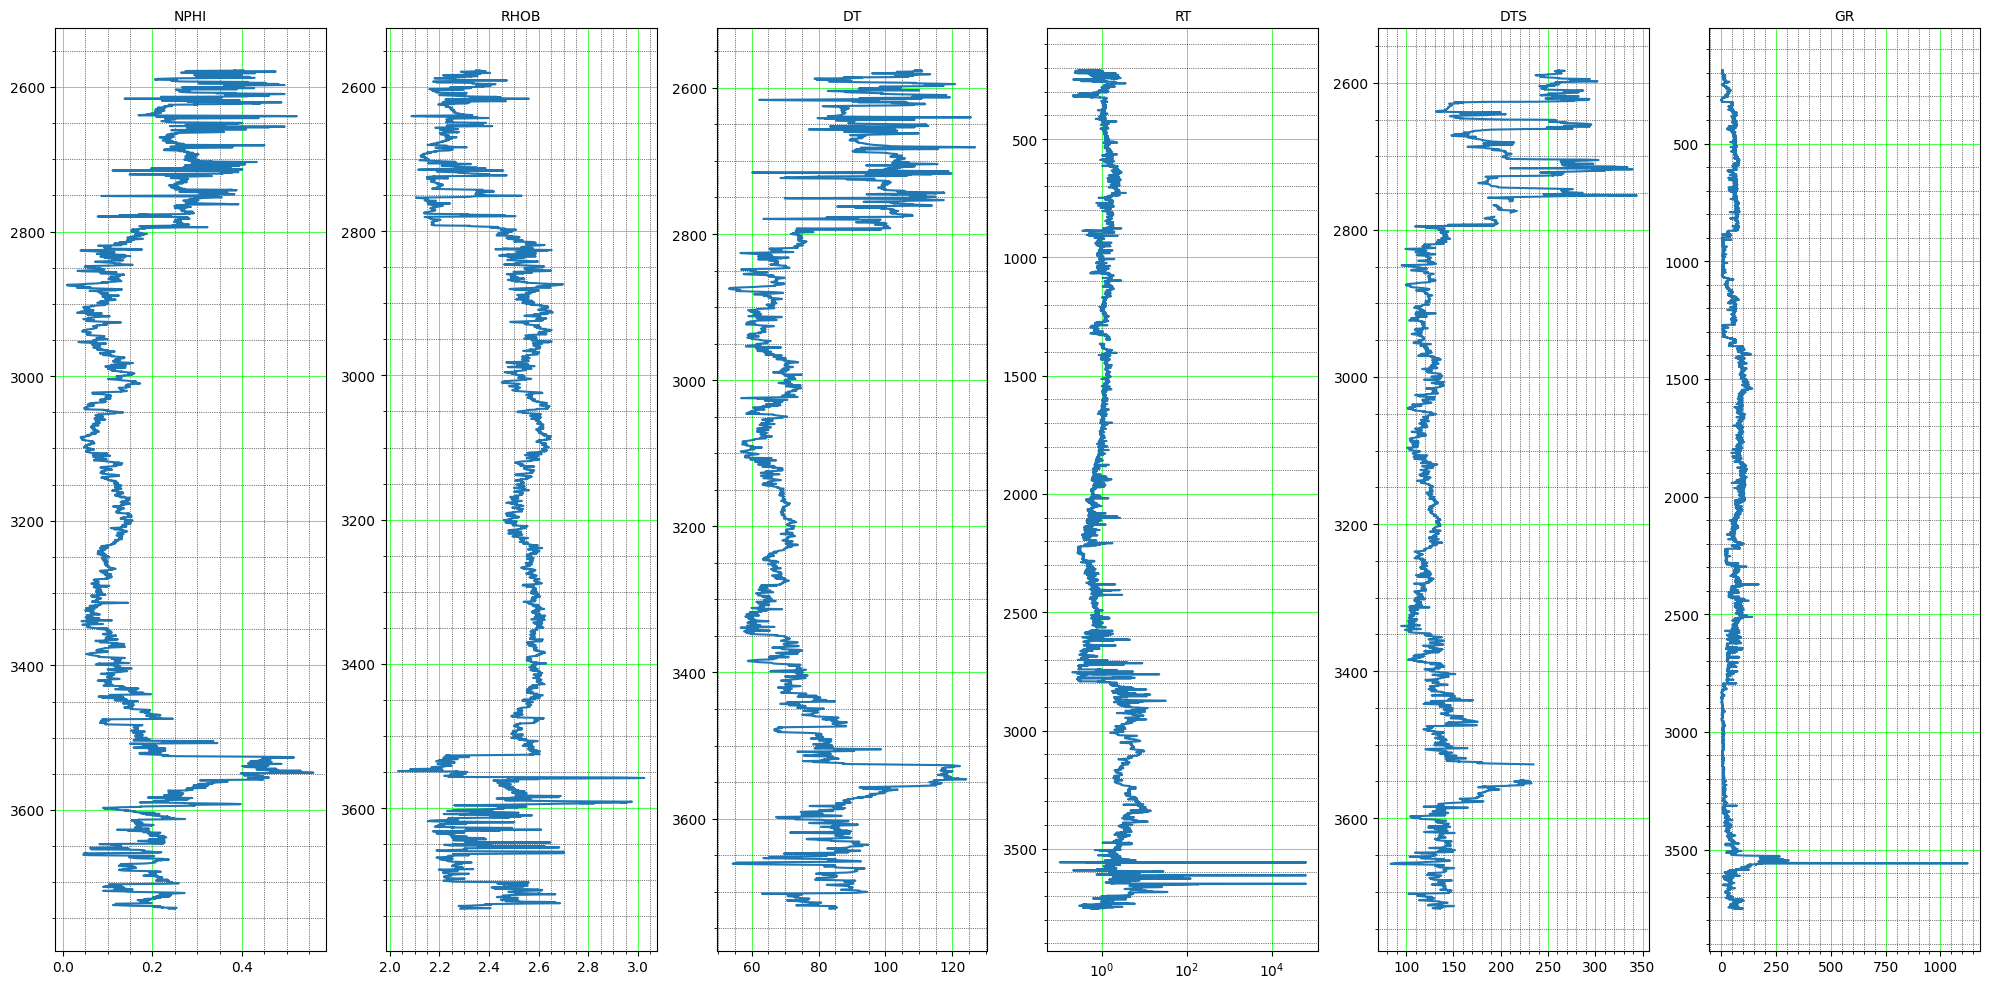

In [ ]:
column_list = ['NPHI', 'RHOB', 'DT', 'RT', 'DTS', 'GR']

well_log_display(well, 'DEPTH', column_list, column_semilog=3)

In [ ]:
well.columns

Index(['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI',
       'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD',
       'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT'],
      dtype='object')

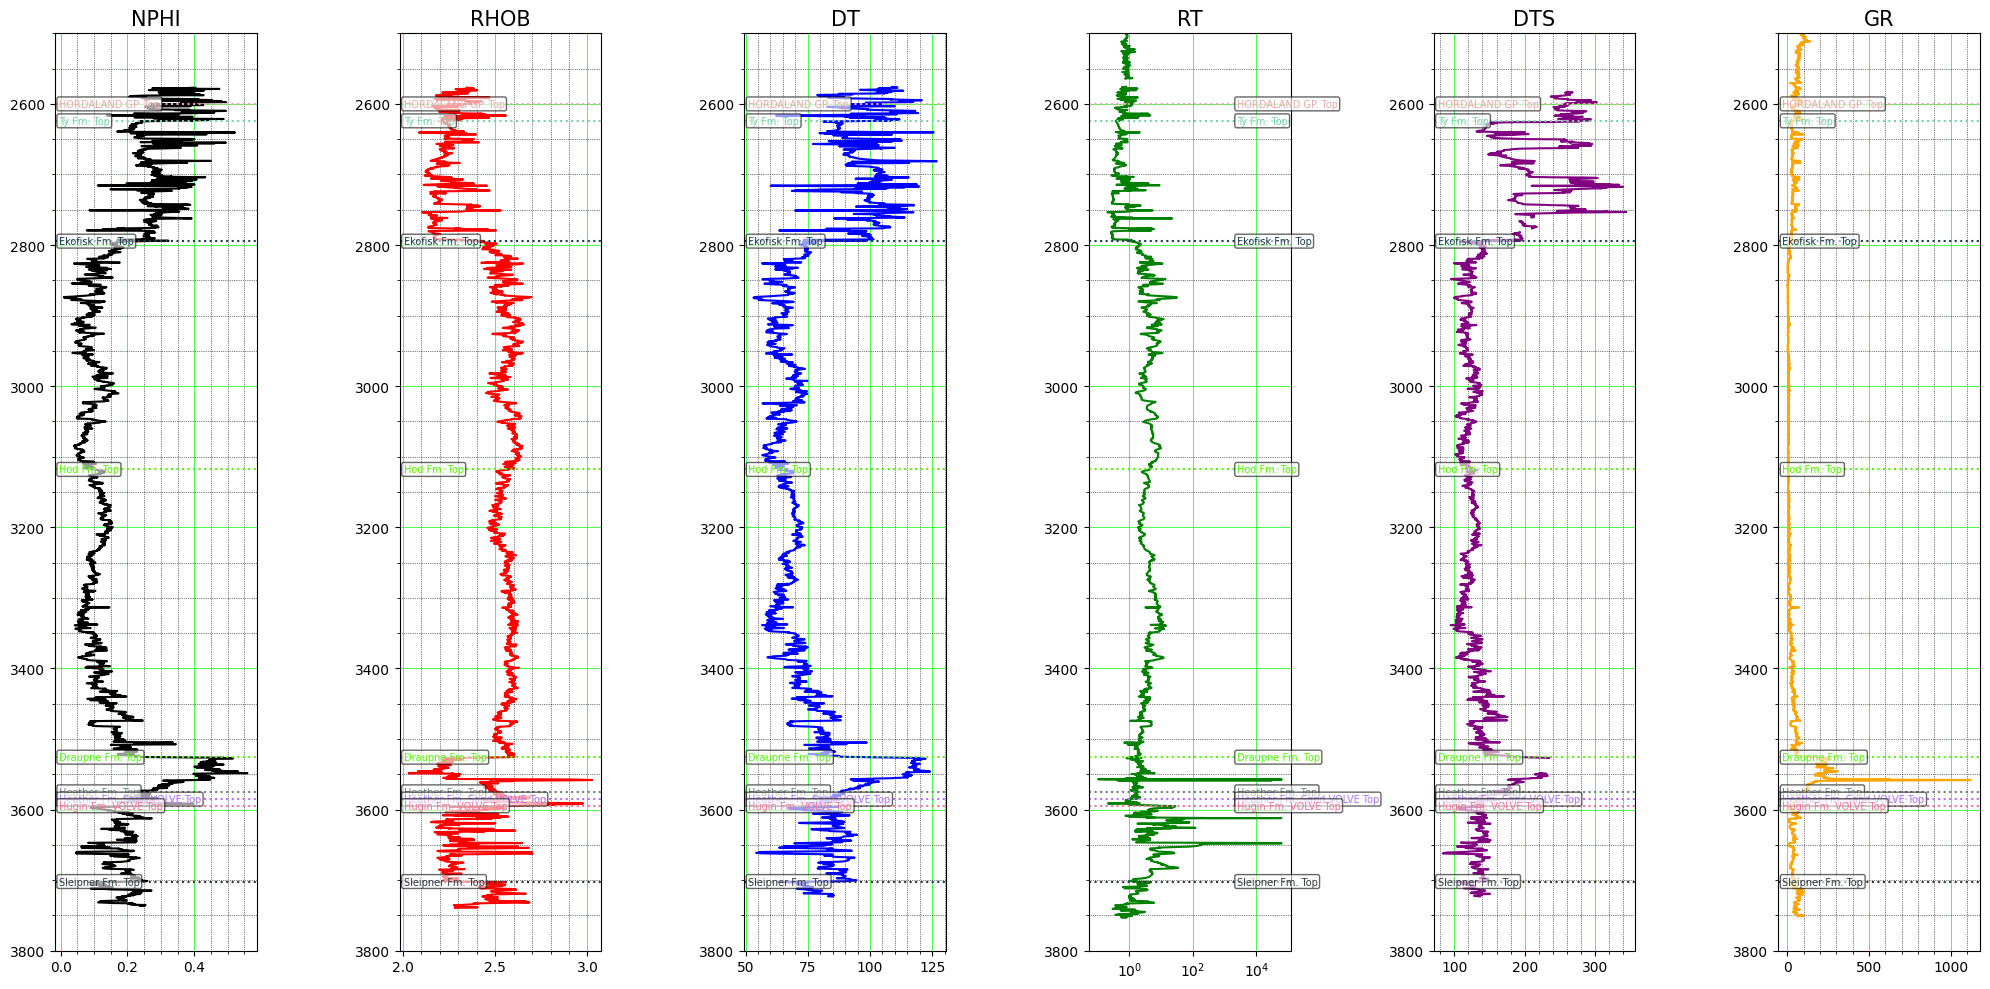

In [ ]:
column_list = ['NPHI', 'RHOB', 'DT', 'RT', 'DTS', 'GR']
colors      = ['black', 'red', 'blue', 'green', 'purple', 'orange']

well_log_display(well, 'DEPTH', column_list,
                 column_semilog=3,
                 min_depth=2500, max_depth=3800, colors=colors, title_size=15,
                 fm_tops=fm_tops, fm_depths=fm_depths)

## 3c Triple combo and scatter plots (Neutron-density)

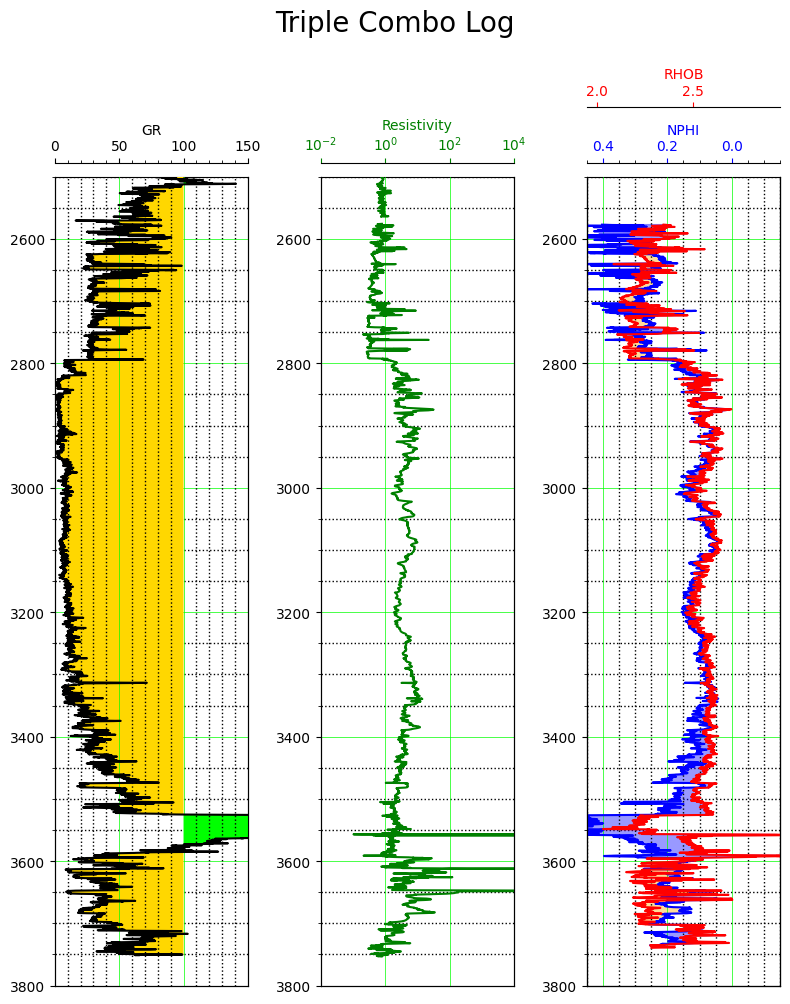

In [ ]:
triple_combo(well, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB',
             min_depth=2500, max_depth=3800,
             min_GR=0, max_GR=150, sand_GR_line=100,
             max_resistivity=10000,
             figsize=(8,8), title_size=20, title_height=1)

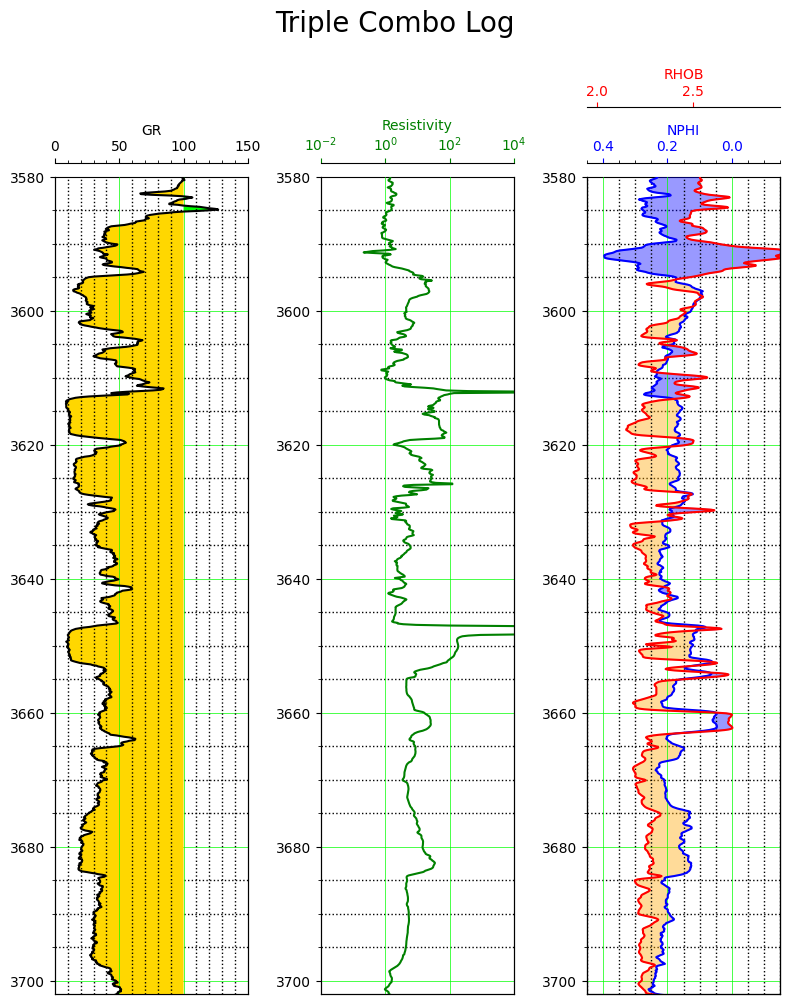

In [ ]:
triple_combo(well, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB',
             min_depth=3580, max_depth=3702,
             min_GR=0, max_GR=150, sand_GR_line=100,
             max_resistivity=10000,
             figsize=(8,8), title_size=20, title_height=1)

In [ ]:
# Limit depth from 2800 to 3600
# Do masking: Select dataframe where the DEPTH is between 2800 and 3600
mask = (well['DEPTH']>3580) & (well['DEPTH']<3700)

# apply
well2 = well[mask]

well2

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
33916,3580.1,2.528,2.538,2.535,2.561,8.5,8.672,0.056,87.183,139.320,...,6.996,1.410,1.517,1.442,2.535,1.420,19.763,1.420,1.442,1.420
33917,3580.2,2.531,2.542,2.533,2.557,8.5,8.672,0.055,87.545,138.353,...,6.970,1.430,1.520,1.424,2.535,1.390,19.762,1.390,1.424,1.390
33918,3580.3,2.537,2.544,2.537,2.550,8.5,8.672,0.056,87.718,137.118,...,6.958,1.410,1.510,1.433,2.537,1.413,19.778,1.413,1.433,1.413
33919,3580.4,2.545,2.546,2.544,2.544,8.5,8.672,0.060,87.825,135.912,...,6.964,1.464,1.516,1.398,2.542,1.330,19.795,1.330,1.398,1.330
33920,3580.5,2.552,2.549,2.550,2.540,8.5,8.672,0.064,87.885,134.804,...,6.978,1.551,1.528,1.357,2.545,1.246,19.811,1.246,1.357,1.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35110,3699.5,2.241,2.233,2.231,2.236,8.5,8.625,0.048,92.386,144.616,...,5.652,1.357,1.417,1.426,2.232,1.571,17.608,1.571,1.426,1.571
35111,3699.6,2.240,2.233,2.234,2.234,8.5,8.672,0.047,92.589,145.234,...,5.624,1.340,1.395,1.420,2.233,1.596,17.633,1.596,1.420,1.596
35112,3699.7,2.241,2.234,2.237,2.233,8.5,8.672,0.047,92.838,145.789,...,5.592,1.330,1.378,1.408,2.234,1.604,17.700,1.604,1.408,1.604
35113,3699.8,2.242,2.234,2.238,2.232,8.5,8.672,0.046,93.151,146.165,...,5.568,1.313,1.355,1.395,2.234,1.600,17.768,1.600,1.395,1.600


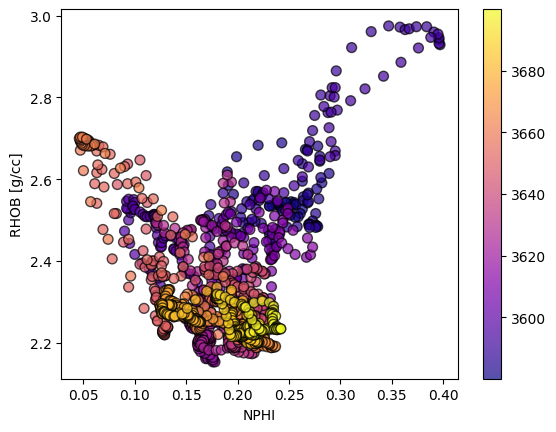

In [ ]:
# Neutron-density
plt.scatter(well2['NPHI'], well2['RHOB'], s=50, lw=1, edgecolor='k',
            alpha=0.7, c=well2['DEPTH'], cmap='plasma')
plt.xlabel('NPHI'); plt.ylabel('RHOB [g/cc]')
plt.colorbar()
plt.show()

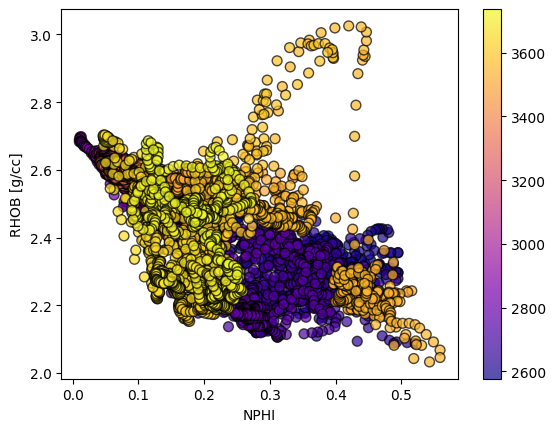

In [ ]:
# Neutron-density
plt.scatter(well['NPHI'], well['RHOB'], s=50, lw=1, edgecolor='k',
            alpha=0.7, c=well['DEPTH'], cmap='plasma')
plt.xlabel('NPHI'); plt.ylabel('RHOB [g/cc]')
plt.colorbar()
plt.show()

In [ ]:
def ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by,
            figsize=(7,7), scatter_size=50, scatter_alpha=0.5):
  """
  Producing Neutron-Density (Cross)plot

  Input:

  denfl is your fluid density
  df is your dataframe
  column_nphi and column_rhob are the column name of your NPHI and RHOB
  column_hue is the column name that you want for the color of the points
    e.g. depth, vshale, formation labels, etc.

  color_by depends on the column_hue that you're giving
    * if you're giving a continuous hue (numerical) like depth or vshale
      define color_by='continuous'
    * if you're giving a categorical hue (labels) like formation names
      define color_by='categorical'

  figsize, scatter_size, scatter_alpha are by default. You can also specify
    by yourselves.

  Output:

  3 lines. Blue is sandstone, black is limestone, red is dolomite
  Each line has dots representing porosity value from 0 to 0.5
    by increment of 0.05
  """

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns
  plt.style.use('ggplot')
  sns.set_theme(color_codes=True)

  lsX = np.arange(0, 0.55, 0.05)

  ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
  dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

  ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
  dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

  ssSnpX = np.empty((np.size(lsX),0), float)
  dolSnpX = np.empty((np.size(lsX),0), float)
  ssCnlX = np.empty((np.size(lsX),0), float)
  dolCnlX = np.empty((np.size(lsX),0), float)

  for i in np.nditer(lsX):
      ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
      dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
      ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
      dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

  densma_Ls = 2.71; densma_Ss = 2.65; densma_Dol = 2.87 #densma: density matrix

  denLs = (denfl - densma_Ls) * lsX + densma_Ls
  denSs = (denfl - densma_Ss) * lsX + densma_Ss
  denDol = (denfl - densma_Dol) * lsX + densma_Dol

  if color_by == 'continuous':
    # plot data with color of the continuous variable defined (depth, vsh, etc.)
    plt.figure(figsize=figsize)

    plt.scatter(df[column_nphi], df[column_rhob], c=df[column_hue],
                alpha=scatter_alpha, cmap='viridis')
    plt.colorbar()

    # plot the sand, limestone, and dolomite line (using Seaborn)
    plt.plot(ssCnlX, denSs, '.-', color='blue', markersize=10, label = 'Sandstone')
    plt.plot(lsX, denLs, '.-', color='black', markersize=10, label = 'Limestone')
    plt.plot(dolCnlX, denDol, '.-', color='red', markersize=10, label = 'Dolomite')

    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (v/v)'); plt.ylabel('RHOB (g/cc)')

  if color_by == 'categorical':
    # plot data with color of each formation names (using Seaborn)
    lm = sns.lmplot(data=df, x=column_nphi, y=column_rhob, hue=column_hue,
                    fit_reg=False, height=figsize[0],
                    scatter_kws={'s': scatter_size, 'alpha': scatter_alpha})

    ax = lm.axes

    # plot the sand, limestone, and dolomite line (using Seaborn)
    lines = pd.DataFrame({'ssCnlX': ssCnlX, 'lsX': lsX, 'dolCnlX': dolCnlX,
                          'denLs': denLs, 'denSs': denSs, 'denDol': denDol})

    sns.lineplot(data=lines, x='ssCnlX', y='denSs', color='blue',
                     legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='lsX', y='denLs', color='black',
                 legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='dolCnlX', y='denDol', color='red',
                 legend=False, marker='o', ax=ax[0,0])

    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (v/v)'); plt.ylabel('RHOB (g/cc)')

    plt.show()

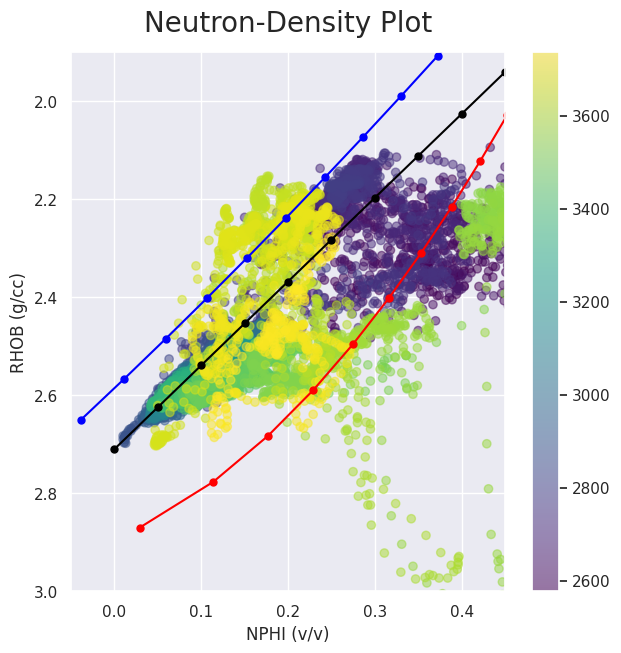

In [ ]:
ND_plot(1, well, 'NPHI', 'RHOB', 'DEPTH', 'continuous')

## 3d Generate formation labels

In [ ]:
# Rename column
tops.columns = ['FM. LABEL', 'DEPTH']

tops.head()

,FM. LABEL,DEPTH
0,HORDALAND GP. Top,2600.0
1,Ty Fm. Top,2624.0
2,Ekofisk Fm. Top,2794.5
3,Hod Fm. Top,3118.0
4,Draupne Fm. Top,3525.8


In [ ]:
well = label_generator(well, tops, 'DEPTH', 'FM. LABEL')

well[['DEPTH', 'NPHI', 'RHOB', 'FM. LABEL']]

/content/formation-evaluation/label_generator.py:44: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_well[label_name].loc[indexes] = topnames
/content/formation-evaluation/label_generator.py:44: FutureWarning: Setting an item of incompatibl

,DEPTH,NPHI,RHOB,FM. LABEL
0,188.5,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN
...,...,...,...,...
35730,3761.5,0.25,2.284,Sleipner Fm. Top
35731,3761.6,0.25,2.284,Sleipner Fm. Top
35732,3761.7,0.25,2.284,Sleipner Fm. Top
35733,3761.8,0.25,2.284,Sleipner Fm. Top


In [ ]:
well['FM. LABEL'] = well['FM. LABEL'].fillna('Unknown')

well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,...,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


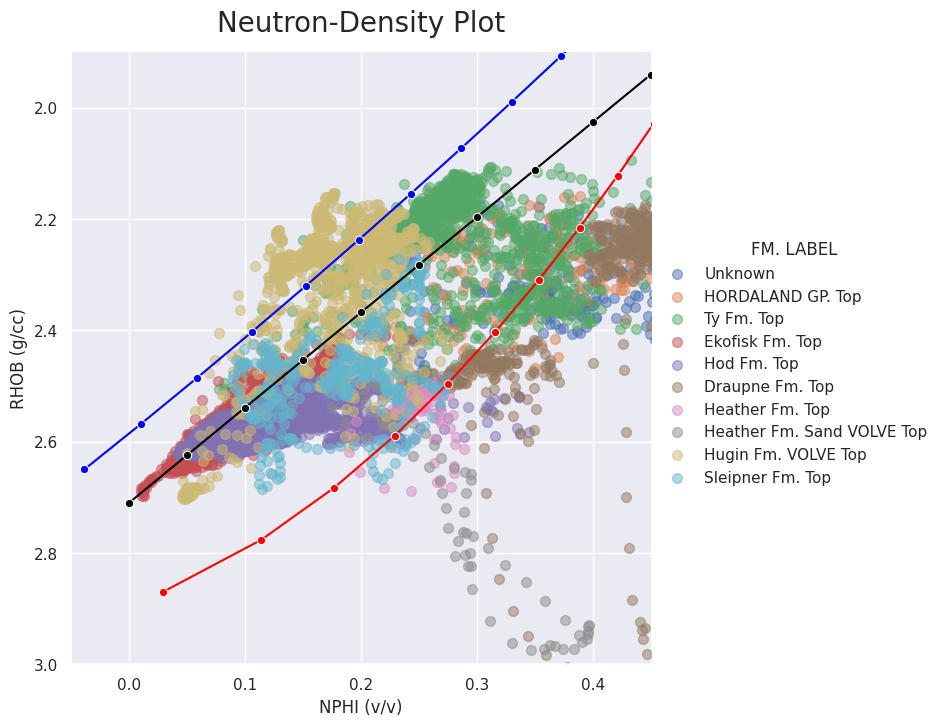

In [ ]:
ND_plot(1, well, 'NPHI', 'RHOB', 'FM. LABEL', color_by='categorical')


## 3e Calculation of total porosity (PHIT), shale volume (VSH)water saturation (SW), and permeability (K)

In [ ]:
# Define our reservoir interval
# 3600 - 3700 m
reservoir = well[(well['DEPTH']>3600) & (well['DEPTH']<3700)].reset_index(drop=True)

reservoir

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,3600.1,2.390,2.454,2.492,2.475,8.5,8.625,0.058,74.114,113.027,26.861,0.128,6.257,4.140,4.754,4.501,2.456,4.561,19.715,4.561,4.501,4.561
1,3600.2,2.406,2.464,2.488,2.479,8.5,8.625,0.063,74.373,114.324,27.926,0.130,6.239,4.122,4.719,4.485,2.461,4.575,19.735,4.575,4.485,4.575
2,3600.3,2.419,2.469,2.480,2.477,8.5,8.625,0.065,74.439,115.029,28.396,0.135,6.197,4.278,4.777,4.222,2.461,4.074,19.754,4.073,4.222,4.074
3,3600.4,2.424,2.471,2.472,2.473,8.5,8.625,0.063,74.297,114.781,25.706,0.140,6.151,4.320,4.758,4.163,2.456,3.863,19.753,3.864,4.163,3.863
4,3600.5,2.426,2.468,2.462,2.469,8.5,8.672,0.060,74.034,114.903,24.298,0.143,6.130,4.214,4.709,4.233,2.451,4.075,19.751,4.076,4.233,4.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3699.5,2.241,2.233,2.231,2.236,8.5,8.625,0.048,92.386,144.616,45.100,0.239,5.652,1.357,1.417,1.426,2.232,1.571,17.608,1.571,1.426,1.571
995,3699.6,2.240,2.233,2.234,2.234,8.5,8.672,0.047,92.589,145.234,44.975,0.238,5.624,1.340,1.395,1.420,2.233,1.596,17.633,1.596,1.420,1.596
996,3699.7,2.241,2.234,2.237,2.233,8.5,8.672,0.047,92.838,145.789,44.635,0.240,5.592,1.330,1.378,1.408,2.234,1.604,17.700,1.604,1.408,1.604
997,3699.8,2.242,2.234,2.238,2.232,8.5,8.672,0.046,93.151,146.165,44.137,0.242,5.568,1.313,1.355,1.395,2.234,1.600,17.768,1.600,1.395,1.600


$$PHID=\frac{\rho_{m}-\rho_{b}}{\rho_{m}-\rho_{f}}$$

In [ ]:
reservoir['RHOB'].values

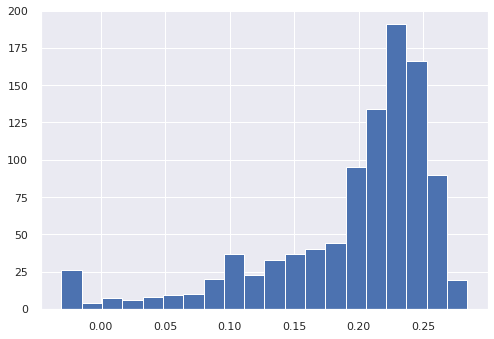

In [ ]:
# Calculate density porosity (PHID)
def phid(rhom, rhob, rhof):
  return (rhom - rhob) / (rhom - rhof)

rhom = 2.65 # Sandstone, limestone=2.71, dolomite=2.85
rhof = 0.9
rhob = reservoir['RHOB'].values

PHID = phid(rhom, rhob, rhof)

plt.hist(PHID, bins=20)
plt.show()

In [ ]:
# To add calculation result to dataframe
reservoir['PHID'] = PHID

reservoir

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,PHID
0,3600.1,2.390,2.454,2.492,2.475,8.5,8.625,0.058,74.114,113.027,26.861,0.128,6.257,4.140,4.754,4.501,2.456,4.561,19.715,4.561,4.501,4.561,0.110857
1,3600.2,2.406,2.464,2.488,2.479,8.5,8.625,0.063,74.373,114.324,27.926,0.130,6.239,4.122,4.719,4.485,2.461,4.575,19.735,4.575,4.485,4.575,0.108000
2,3600.3,2.419,2.469,2.480,2.477,8.5,8.625,0.065,74.439,115.029,28.396,0.135,6.197,4.278,4.777,4.222,2.461,4.074,19.754,4.073,4.222,4.074,0.108000
3,3600.4,2.424,2.471,2.472,2.473,8.5,8.625,0.063,74.297,114.781,25.706,0.140,6.151,4.320,4.758,4.163,2.456,3.863,19.753,3.864,4.163,3.863,0.110857
4,3600.5,2.426,2.468,2.462,2.469,8.5,8.672,0.060,74.034,114.903,24.298,0.143,6.130,4.214,4.709,4.233,2.451,4.075,19.751,4.076,4.233,4.075,0.113714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3699.5,2.241,2.233,2.231,2.236,8.5,8.625,0.048,92.386,144.616,45.100,0.239,5.652,1.357,1.417,1.426,2.232,1.571,17.608,1.571,1.426,1.571,0.238857
995,3699.6,2.240,2.233,2.234,2.234,8.5,8.672,0.047,92.589,145.234,44.975,0.238,5.624,1.340,1.395,1.420,2.233,1.596,17.633,1.596,1.420,1.596,0.238286
996,3699.7,2.241,2.234,2.237,2.233,8.5,8.672,0.047,92.838,145.789,44.635,0.240,5.592,1.330,1.378,1.408,2.234,1.604,17.700,1.604,1.408,1.604,0.237714
997,3699.8,2.242,2.234,2.238,2.232,8.5,8.672,0.046,93.151,146.165,44.137,0.242,5.568,1.313,1.355,1.395,2.234,1.600,17.768,1.600,1.395,1.600,0.237714


$$PHIT=PHID + a \cdot (NPHI-PHID) + b$$

<function matplotlib.pyplot.show>

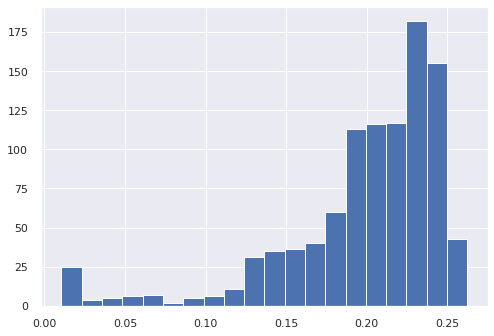

In [ ]:
# Calculate PHIT from PHID
def phit(phid, nphi, a, b):
  return phid + a * (nphi - phid) + b

# Typical a and b for sandstone
a, b = 0.4, 0.01
phid = reservoir['PHID'].values
nphi = reservoir['NPHI'].values

PHIT = phit(phid, nphi, a, b)

plt.hist(PHIT, bins=20)
plt.show

In [ ]:
reservoir['PHIT'] = PHIT

reservoir

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,PHID,PHIT
0,3600.1,2.390,2.454,2.492,2.475,8.5,8.625,0.058,74.114,113.027,26.861,0.128,6.257,4.140,4.754,4.501,2.456,4.561,19.715,4.561,4.501,4.561,0.110857,0.127714
1,3600.2,2.406,2.464,2.488,2.479,8.5,8.625,0.063,74.373,114.324,27.926,0.130,6.239,4.122,4.719,4.485,2.461,4.575,19.735,4.575,4.485,4.575,0.108000,0.126800
2,3600.3,2.419,2.469,2.480,2.477,8.5,8.625,0.065,74.439,115.029,28.396,0.135,6.197,4.278,4.777,4.222,2.461,4.074,19.754,4.073,4.222,4.074,0.108000,0.128800
3,3600.4,2.424,2.471,2.472,2.473,8.5,8.625,0.063,74.297,114.781,25.706,0.140,6.151,4.320,4.758,4.163,2.456,3.863,19.753,3.864,4.163,3.863,0.110857,0.132514
4,3600.5,2.426,2.468,2.462,2.469,8.5,8.672,0.060,74.034,114.903,24.298,0.143,6.130,4.214,4.709,4.233,2.451,4.075,19.751,4.076,4.233,4.075,0.113714,0.135429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3699.5,2.241,2.233,2.231,2.236,8.5,8.625,0.048,92.386,144.616,45.100,0.239,5.652,1.357,1.417,1.426,2.232,1.571,17.608,1.571,1.426,1.571,0.238857,0.248914
995,3699.6,2.240,2.233,2.234,2.234,8.5,8.672,0.047,92.589,145.234,44.975,0.238,5.624,1.340,1.395,1.420,2.233,1.596,17.633,1.596,1.420,1.596,0.238286,0.248171
996,3699.7,2.241,2.234,2.237,2.233,8.5,8.672,0.047,92.838,145.789,44.635,0.240,5.592,1.330,1.378,1.408,2.234,1.604,17.700,1.604,1.408,1.604,0.237714,0.248629
997,3699.8,2.242,2.234,2.238,2.232,8.5,8.672,0.046,93.151,146.165,44.137,0.242,5.568,1.313,1.355,1.395,2.234,1.600,17.768,1.600,1.395,1.600,0.237714,0.249429


$$VSH=\frac{GR_{meas}-GR_{min}}{GR_{max}-GR_{min}}$$

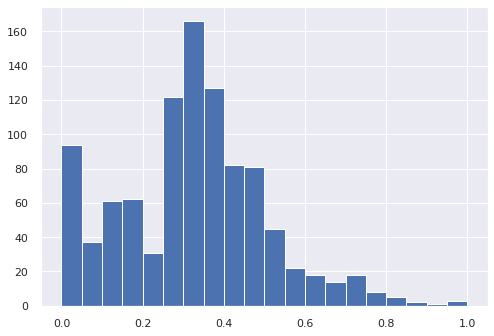

In [ ]:
def vsh(gr_meas):
  gr_min = np.min(gr_meas)
  gr_max = np.max(gr_meas)
  vsh = (gr_meas - gr_min) / (gr_max - gr_min)
  return vsh

gr_meas = reservoir['GR'].values

VSH = vsh(gr_meas)

plt.hist(VSH, bins=20)
plt.show()

In [ ]:
reservoir['VSH'] = VSH

reservoir

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,PHID,PHIT,VSH
0,3600.1,2.390,2.454,2.492,2.475,8.5,8.625,0.058,74.114,113.027,26.861,0.128,6.257,4.140,4.754,4.501,2.456,4.561,19.715,4.561,4.501,4.561,0.110857,0.127714,0.241907
1,3600.2,2.406,2.464,2.488,2.479,8.5,8.625,0.063,74.373,114.324,27.926,0.130,6.239,4.122,4.719,4.485,2.461,4.575,19.735,4.575,4.485,4.575,0.108000,0.126800,0.255921
2,3600.3,2.419,2.469,2.480,2.477,8.5,8.625,0.065,74.439,115.029,28.396,0.135,6.197,4.278,4.777,4.222,2.461,4.074,19.754,4.073,4.222,4.074,0.108000,0.128800,0.262106
3,3600.4,2.424,2.471,2.472,2.473,8.5,8.625,0.063,74.297,114.781,25.706,0.140,6.151,4.320,4.758,4.163,2.456,3.863,19.753,3.864,4.163,3.863,0.110857,0.132514,0.226709
4,3600.5,2.426,2.468,2.462,2.469,8.5,8.672,0.060,74.034,114.903,24.298,0.143,6.130,4.214,4.709,4.233,2.451,4.075,19.751,4.076,4.233,4.075,0.113714,0.135429,0.208182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3699.5,2.241,2.233,2.231,2.236,8.5,8.625,0.048,92.386,144.616,45.100,0.239,5.652,1.357,1.417,1.426,2.232,1.571,17.608,1.571,1.426,1.571,0.238857,0.248914,0.481907
995,3699.6,2.240,2.233,2.234,2.234,8.5,8.672,0.047,92.589,145.234,44.975,0.238,5.624,1.340,1.395,1.420,2.233,1.596,17.633,1.596,1.420,1.596,0.238286,0.248171,0.480262
996,3699.7,2.241,2.234,2.237,2.233,8.5,8.672,0.047,92.838,145.789,44.635,0.240,5.592,1.330,1.378,1.408,2.234,1.604,17.700,1.604,1.408,1.604,0.237714,0.248629,0.475788
997,3699.8,2.242,2.234,2.238,2.232,8.5,8.672,0.046,93.151,146.165,44.137,0.242,5.568,1.313,1.355,1.395,2.234,1.600,17.768,1.600,1.395,1.600,0.237714,0.249429,0.469235


$$S_w=(\frac{R_w}{(\phi^m \cdot R_t)})^{\frac{1}{n}}$$

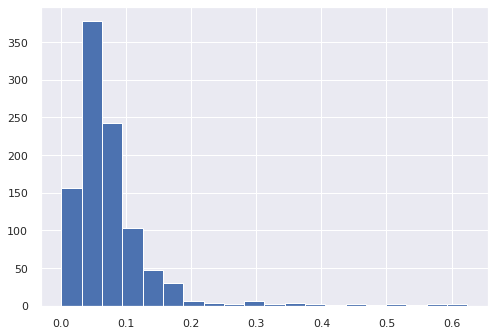

In [ ]:
def sw(rt, rw, phit, m, n):
  return (rw / (phit**m * rt))**(1/n)

rw = 0.001 # Water resistivity, ohm
m, n = 2, 2 # Archie exponent
phit = reservoir['PHIT'].values
rt = reservoir['RT'].values

SW = sw(rt, rw, phit, m, n)

plt.hist(SW, bins=20)
plt.show()

In [ ]:
reservoir['SW'] = SW

reservoir

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,PHID,PHIT,VSH,SW
0,3600.1,2.390,2.454,2.492,2.475,8.5,8.625,0.058,74.114,113.027,26.861,0.128,6.257,4.140,4.754,4.501,2.456,4.561,19.715,4.561,4.501,4.561,0.110857,0.127714,0.241907,0.115939
1,3600.2,2.406,2.464,2.488,2.479,8.5,8.625,0.063,74.373,114.324,27.926,0.130,6.239,4.122,4.719,4.485,2.461,4.575,19.735,4.575,4.485,4.575,0.108000,0.126800,0.255921,0.116596
2,3600.3,2.419,2.469,2.480,2.477,8.5,8.625,0.065,74.439,115.029,28.396,0.135,6.197,4.278,4.777,4.222,2.461,4.074,19.754,4.073,4.222,4.074,0.108000,0.128800,0.262106,0.121639
3,3600.4,2.424,2.471,2.472,2.473,8.5,8.625,0.063,74.297,114.781,25.706,0.140,6.151,4.320,4.758,4.163,2.456,3.863,19.753,3.864,4.163,3.863,0.110857,0.132514,0.226709,0.121416
4,3600.5,2.426,2.468,2.462,2.469,8.5,8.672,0.060,74.034,114.903,24.298,0.143,6.130,4.214,4.709,4.233,2.451,4.075,19.751,4.076,4.233,4.075,0.113714,0.135429,0.208182,0.115671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3699.5,2.241,2.233,2.231,2.236,8.5,8.625,0.048,92.386,144.616,45.100,0.239,5.652,1.357,1.417,1.426,2.232,1.571,17.608,1.571,1.426,1.571,0.238857,0.248914,0.481907,0.101359
995,3699.6,2.240,2.233,2.234,2.234,8.5,8.672,0.047,92.589,145.234,44.975,0.238,5.624,1.340,1.395,1.420,2.233,1.596,17.633,1.596,1.420,1.596,0.238286,0.248171,0.480262,0.100863
996,3699.7,2.241,2.234,2.237,2.233,8.5,8.672,0.047,92.838,145.789,44.635,0.240,5.592,1.330,1.378,1.408,2.234,1.604,17.700,1.604,1.408,1.604,0.237714,0.248629,0.475788,0.100426
997,3699.8,2.242,2.234,2.238,2.232,8.5,8.672,0.046,93.151,146.165,44.137,0.242,5.568,1.313,1.355,1.395,2.234,1.600,17.768,1.600,1.395,1.600,0.237714,0.249429,0.469235,0.100229


$$k=\frac{0.136 \phi^{4.4}}{S_{wirr}^2}$$

For PHIT and Swirr in %

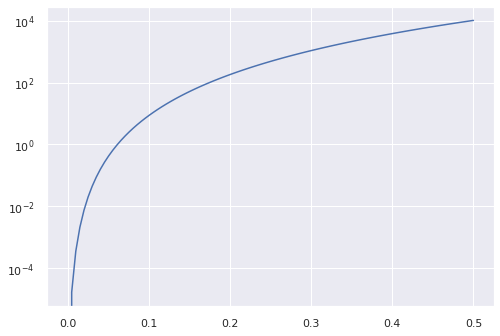

In [ ]:
def perm(phit, swirr):
  phit, swirr = phit*100, swirr*100
  return 0.136 * phit**4.4 / swirr**2

phit = np.linspace(0, 0.5, 100)
swirr = 0.2
k = perm(phit, swirr)

plt.plot(phit, k)
plt.yscale('log')

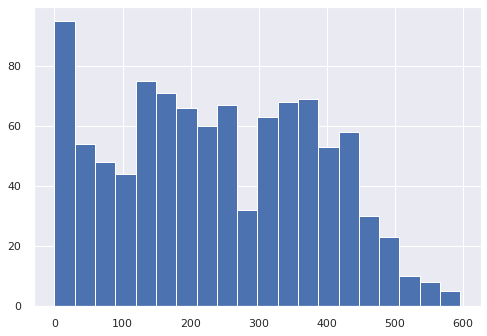

In [ ]:
phit = reservoir['PHIT'].values
swirr = 0.2

K = perm(phit, swirr)

plt.hist(K, bins=20)
plt.show()

In [ ]:
reservoir['K'] = K

reservoir

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,PHID,PHIT,VSH,SW,K
0,3600.1,2.390,2.454,2.492,2.475,8.5,8.625,0.058,74.114,113.027,26.861,0.128,6.257,4.140,4.754,4.501,2.456,4.561,19.715,4.561,4.501,4.561,0.110857,0.127714,0.241907,0.115939,25.057205
1,3600.2,2.406,2.464,2.488,2.479,8.5,8.625,0.063,74.373,114.324,27.926,0.130,6.239,4.122,4.719,4.485,2.461,4.575,19.735,4.575,4.485,4.575,0.108000,0.126800,0.255921,0.116596,24.277482
2,3600.3,2.419,2.469,2.480,2.477,8.5,8.625,0.065,74.439,115.029,28.396,0.135,6.197,4.278,4.777,4.222,2.461,4.074,19.754,4.073,4.222,4.074,0.108000,0.128800,0.262106,0.121639,26.008105
3,3600.4,2.424,2.471,2.472,2.473,8.5,8.625,0.063,74.297,114.781,25.706,0.140,6.151,4.320,4.758,4.163,2.456,3.863,19.753,3.864,4.163,3.863,0.110857,0.132514,0.226709,0.121416,29.473709
4,3600.5,2.426,2.468,2.462,2.469,8.5,8.672,0.060,74.034,114.903,24.298,0.143,6.130,4.214,4.709,4.233,2.451,4.075,19.751,4.076,4.233,4.075,0.113714,0.135429,0.208182,0.115671,32.434277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3699.5,2.241,2.233,2.231,2.236,8.5,8.625,0.048,92.386,144.616,45.100,0.239,5.652,1.357,1.417,1.426,2.232,1.571,17.608,1.571,1.426,1.571,0.238857,0.248914,0.481907,0.101359,472.169723
995,3699.6,2.240,2.233,2.234,2.234,8.5,8.672,0.047,92.589,145.234,44.975,0.238,5.624,1.340,1.395,1.420,2.233,1.596,17.633,1.596,1.420,1.596,0.238286,0.248171,0.480262,0.100863,466.000896
996,3699.7,2.241,2.234,2.237,2.233,8.5,8.672,0.047,92.838,145.789,44.635,0.240,5.592,1.330,1.378,1.408,2.234,1.604,17.700,1.604,1.408,1.604,0.237714,0.248629,0.475788,0.100426,469.789677
997,3699.8,2.242,2.234,2.238,2.232,8.5,8.672,0.046,93.151,146.165,44.137,0.242,5.568,1.313,1.355,1.395,2.234,1.600,17.768,1.600,1.395,1.600,0.237714,0.249429,0.469235,0.100229,476.477277


Threshold of PHIT 15%, VSH 40%

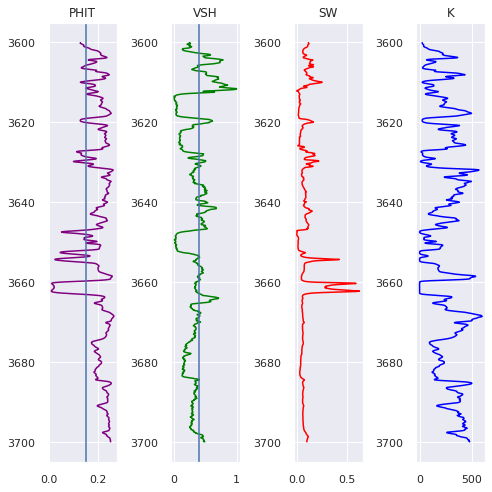

In [ ]:
# Plot this result
logs = ['PHIT', 'VSH', 'SW', 'K']
colors = ['purple', 'green', 'red', 'blue']

plt.figure(figsize=(7,7))
for i in range(len(logs)):
  plt.subplot(1,4,i+1)
  plt.plot(reservoir[logs[i]], reservoir['DEPTH'], c=colors[i])
  if i==0:
    # PHIT threshold
    plt.axvline(0.15)
  if i==1:
    # VSH threshold
    plt.axvline(0.4)
  plt.gca().invert_yaxis()
  plt.title(logs[i])

plt.tight_layout()

In [ ]:
# Make a mask
mask = (reservoir['PHIT'] > 0.15) & (reservoir['VSH'] < 0.4)

target = reservoir[mask]

target

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,PHID,PHIT,VSH,SW,K
12,3601.3,2.433,2.398,2.379,2.425,8.5,8.625,0.064,77.781,122.801,27.911,0.146,5.780,4.623,4.431,4.685,2.400,4.949,19.337,4.951,4.685,4.949,0.142857,0.154114,0.255724,0.092236,57.277977
13,3601.4,2.407,2.382,2.374,2.404,8.5,8.625,0.059,79.295,124.906,27.262,0.147,5.666,4.570,4.367,5.064,2.385,5.801,18.952,5.802,5.064,5.801,0.151429,0.159657,0.247184,0.082236,66.912564
14,3601.5,2.383,2.369,2.375,2.384,8.5,8.625,0.054,80.387,126.429,23.160,0.148,5.612,4.557,4.319,5.321,2.374,6.340,18.569,6.341,5.321,6.340,0.157714,0.163829,0.193208,0.076659,74.953748
15,3601.6,2.369,2.366,2.378,2.372,8.5,8.625,0.054,81.014,127.558,19.277,0.150,5.613,4.555,4.282,5.465,2.370,6.713,18.723,6.714,5.465,6.713,0.160000,0.166000,0.142113,0.073525,79.424503
16,3601.7,2.367,2.369,2.376,2.367,8.5,8.625,0.057,81.393,128.573,18.629,0.154,5.626,4.522,4.192,5.631,2.368,7.412,18.876,7.413,5.631,7.412,0.161143,0.168286,0.133586,0.069022,84.350336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,3697.5,2.257,2.276,2.317,2.277,8.5,8.672,0.044,87.215,137.955,32.949,0.208,5.681,2.225,2.242,2.371,2.287,2.736,17.417,2.736,2.371,2.736,0.207429,0.217657,0.322017,0.087835,261.625326
975,3697.6,2.276,2.293,2.323,2.288,8.5,8.625,0.047,87.878,139.809,34.834,0.216,5.672,2.107,2.160,2.267,2.298,2.603,17.296,2.603,2.267,2.603,0.201143,0.217086,0.346821,0.090288,258.616598
976,3697.7,2.293,2.304,2.316,2.293,8.5,8.625,0.051,88.651,141.934,34.541,0.224,5.624,2.022,2.104,2.173,2.302,2.459,17.174,2.459,2.173,2.459,0.198857,0.218914,0.342965,0.092118,268.339726
977,3697.8,2.299,2.303,2.304,2.292,8.5,8.625,0.053,89.470,144.215,36.105,0.231,5.546,1.978,2.067,2.113,2.298,2.368,17.053,2.368,2.114,2.368,0.201143,0.223086,0.363545,0.092116,291.577939


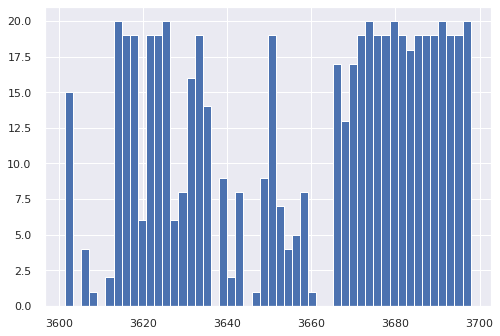

In [ ]:
plt.hist(target['DEPTH'], bins=50)
plt.show()

## 3f Lithology analysis

In [ ]:
# specify file path (well 31/5-7 EOS)
filepath = '/content/formation-evaluation/data/northernlights/WLC_PETRO_COMPUTED_INPUT_1.LAS'

# read with lasio
well = lasio.read(filepath)

In [ ]:
# specify file path (well 31/5-7 EOS)
filepath = '/content/formation-evaluation/data/northernlights/WLC_PETRO_COMPUTED_OUTPUT_1.LAS'
# filepath = '/content/WLC_PETRO_COMPUTED_OUTPUT_1.LAS'

# read with lasio
out = lasio.read(filepath)

In [ ]:
# convert input and output las to dataframe
input = well.df().reset_index()
output = out.df().reset_index()

# merge input and output df
well = input.merge(output, on=['DEPTH'])
well

,DEPTH,CALI,DRHO,DT,DTS,GR,KTIM,NPHI,PPC1_CALI_NORM,RD,...,RS,RT,RXO,TVDMSL,CARB_FLAG,COAL_FLAG,KLOGH,PHIT,SAND_FLAG,VSH
0,1892.3508,NaN,NaN,133.0340,NaN,163.4759,NaN,NaN,12.2390,1.7355,...,1.4094,1.5766,NaN,1861.2841,NaN,NaN,NaN,NaN,0.0,0.6956
1,1892.5032,NaN,NaN,143.3587,NaN,169.1015,NaN,NaN,12.2415,1.6592,...,1.6041,1.6848,NaN,1861.4365,NaN,NaN,NaN,NaN,0.0,0.7425
2,1892.6556,NaN,NaN,138.2003,NaN,192.5121,NaN,NaN,12.2484,1.6274,...,1.3574,1.3609,NaN,1861.5889,NaN,NaN,NaN,NaN,0.0,0.9376
3,1892.8080,NaN,NaN,132.8561,NaN,221.3074,NaN,NaN,12.2499,1.5528,...,1.2409,1.2092,NaN,1861.7413,NaN,NaN,NaN,NaN,0.0,1.1776
4,1892.9604,NaN,NaN,130.3214,NaN,240.5081,NaN,NaN,12.2450,1.4950,...,1.1469,1.1238,NaN,1861.8937,NaN,NaN,NaN,NaN,0.0,1.3376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,2874.8736,8.4836,-0.0105,78.0493,136.1900,91.5509,0.0000,0.3416,NaN,3.2428,...,3.2137,3.2428,3.5291,2843.7749,NaN,NaN,0.0000,0.103599,0.0,0.3777
6448,2875.0260,8.4714,-0.0162,80.7558,137.8549,78.3731,0.0000,0.3418,NaN,1.8793,...,1.8830,1.8793,1.8857,2843.9272,NaN,NaN,0.0000,0.139068,0.0,0.2579
6449,2875.1784,8.4740,-0.0203,85.5174,141.5564,65.1954,0.0000,0.3277,NaN,1.4394,...,1.3872,1.4394,1.3867,2844.0796,NaN,NaN,0.0192,0.175232,0.0,0.1381
6450,2875.3308,8.4862,-0.0180,90.3524,146.4787,69.7041,0.0000,0.3575,NaN,1.6838,...,1.7424,1.6838,1.2162,2844.2319,NaN,NaN,0.0631,0.193589,0.0,0.1791


In [ ]:
well.columns

Index(['DEPTH', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'KTIM', 'NPHI',
       'PPC1_CALI_NORM', 'RD', 'RHOB', 'RM', 'RS', 'RT', 'RXO', 'TVDMSL',
       'CARB_FLAG', 'COAL_FLAG', 'KLOGH', 'PHIT', 'SAND_FLAG', 'VSH'],
      dtype='object')

In [ ]:
well[['DEPTH', 'DT', 'GR', 'RHOB', 'SAND_FLAG', 'CARB_FLAG', 'COAL_FLAG']]

,DEPTH,DT,GR,RHOB,SAND_FLAG,CARB_FLAG,COAL_FLAG
0,1892.3508,133.0340,163.4759,NaN,0.0,NaN,NaN
1,1892.5032,143.3587,169.1015,NaN,0.0,NaN,NaN
2,1892.6556,138.2003,192.5121,NaN,0.0,NaN,NaN
3,1892.8080,132.8561,221.3074,NaN,0.0,NaN,NaN
4,1892.9604,130.3214,240.5081,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
6447,2874.8736,78.0493,91.5509,2.4791,0.0,NaN,NaN
6448,2875.0260,80.7558,78.3731,2.4205,0.0,NaN,NaN
6449,2875.1784,85.5174,65.1954,2.3609,0.0,NaN,NaN
6450,2875.3308,90.3524,69.7041,2.3306,0.0,NaN,NaN


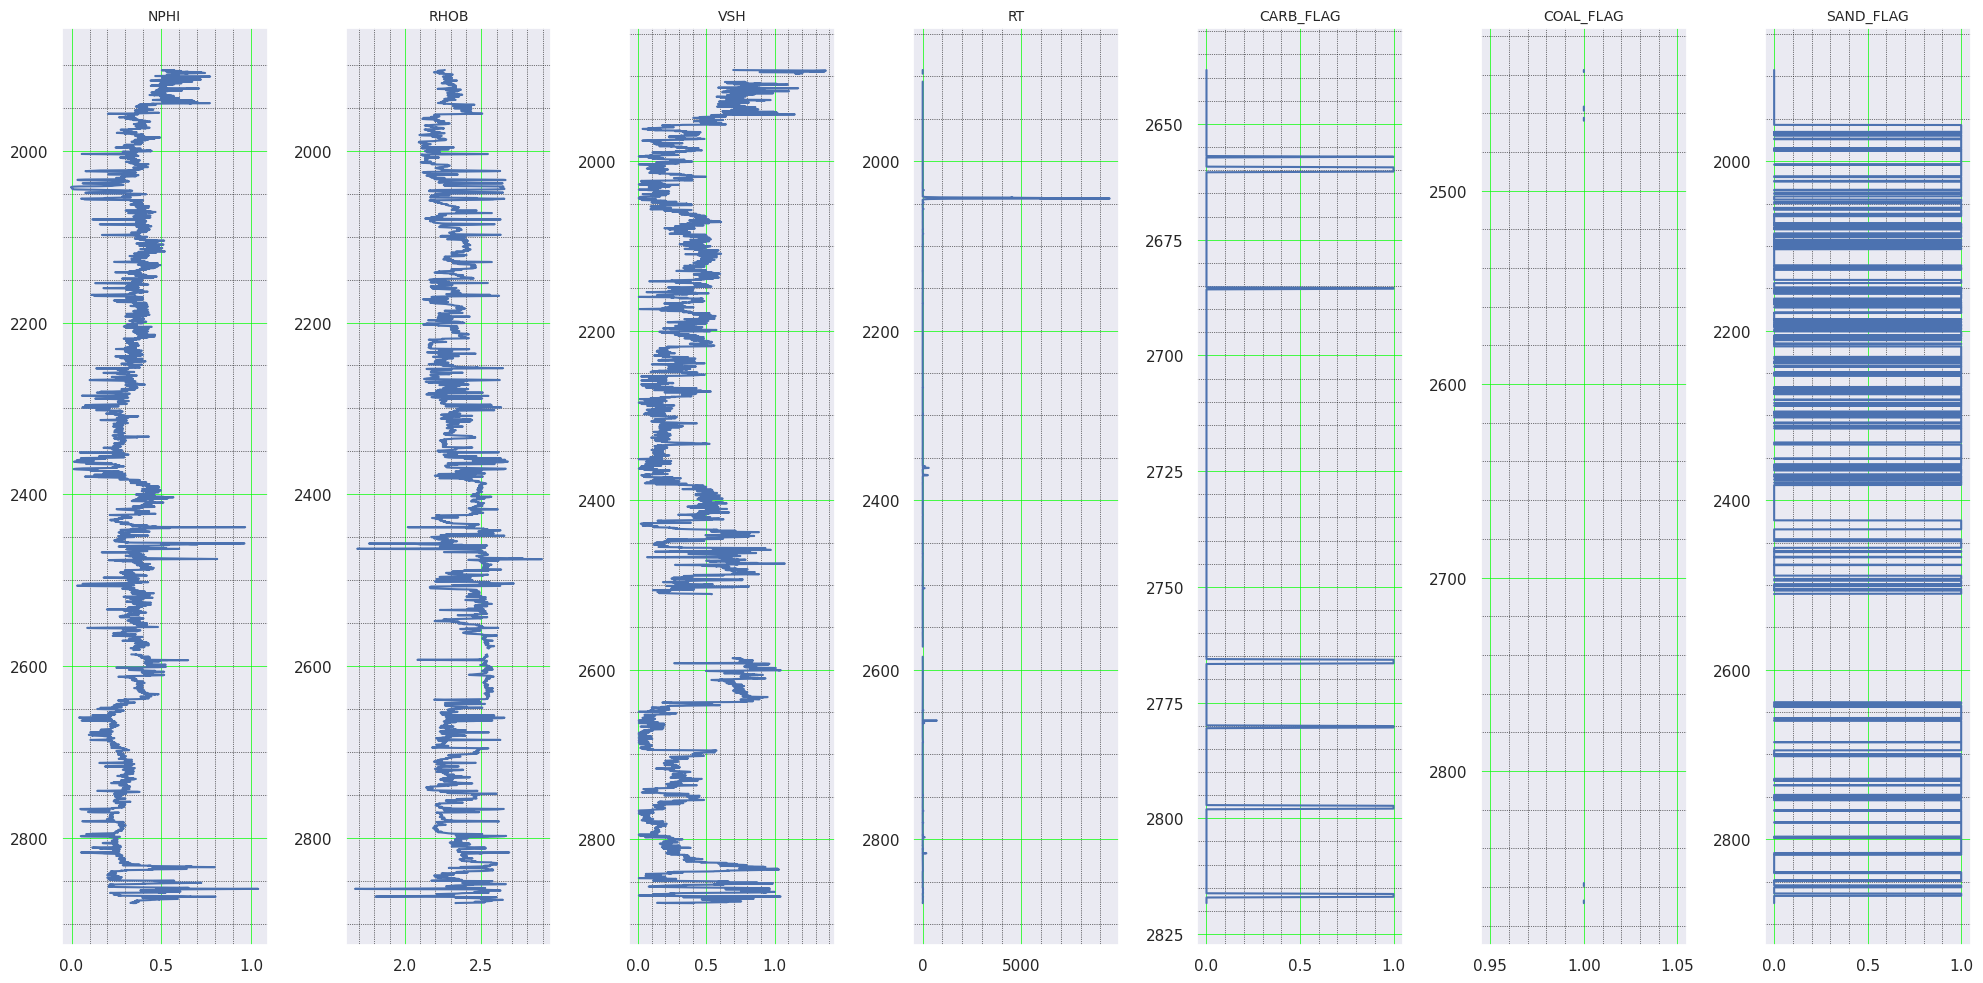

In [ ]:
column_list = ['NPHI', 'RHOB', 'VSH', 'RT', 'CARB_FLAG', 'COAL_FLAG', 'SAND_FLAG']

well_log_display(well, 'DEPTH', column_list)

## 3g Trajectory analysis and fracture data

In [ ]:
well_path = "http://bit.ly/wireline-data"
trajectory_path = "http://bit.ly/trajectory-data"
fracture_path = "http://bit.ly/fractures-data"

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
# Load wellbore trajectory CSV data\
traj_df = pd.read_csv(trajectory_path)

traj_df.head(10)

,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881
5,128.29,315.0,314.9898,1.46,-4.1640,4.3691,314.989847,6.478559e+06,435054.389145
6,124.07,355.3,355.2515,3.41,-5.1536,5.7651,355.251543,6.478558e+06,435055.785053
7,126.98,395.7,395.5379,5.13,-6.9133,8.2034,395.537936,6.478557e+06,435058.223387
8,139.07,436.1,435.7648,5.52,-9.4680,10.9194,435.764783,6.478554e+06,435060.939355
9,152.33,474.4,473.8855,5.62,-12.5207,12.9971,473.885535,6.478551e+06,435063.017149


In [ ]:
# Plot trajectory with inclination as point colors
fig = px.scatter_3d(data_frame=traj_df, x="surfEw", y="surfNs", z="TVD_calc",
                    color="incl")
fig.update_scenes(zaxis_autorange="reversed")

fig.show()

## Pairplot, histogram, KDE

In [ ]:
import seaborn as sns

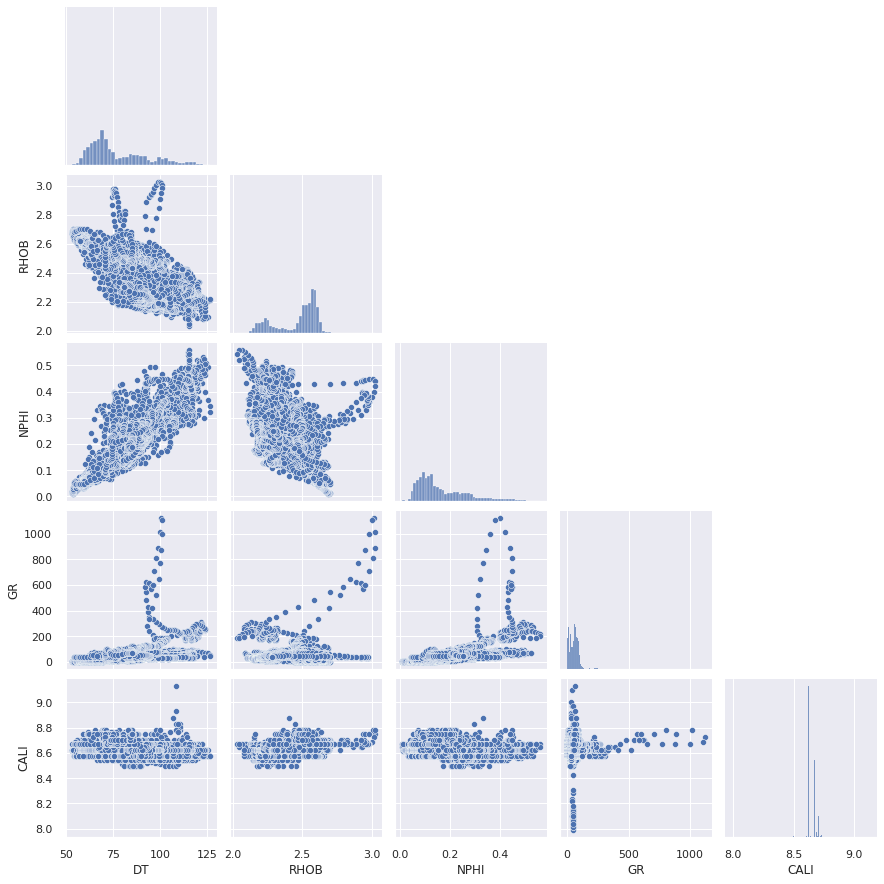

In [ ]:
# Make pairplot
sns.pairplot(well, vars=['DT', 'RHOB', 'NPHI', 'GR', 'CALI'], corner=True)

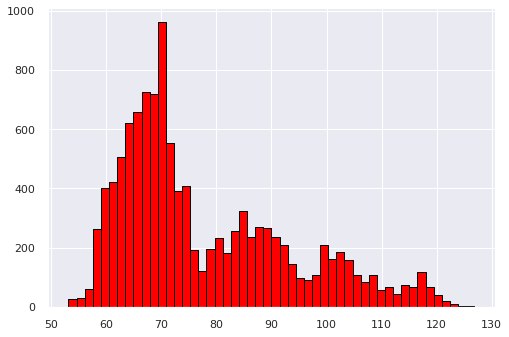

In [ ]:
# Histogram
plt.hist(well['DT'], bins=50, color='red', edgecolor='black')
plt.show()

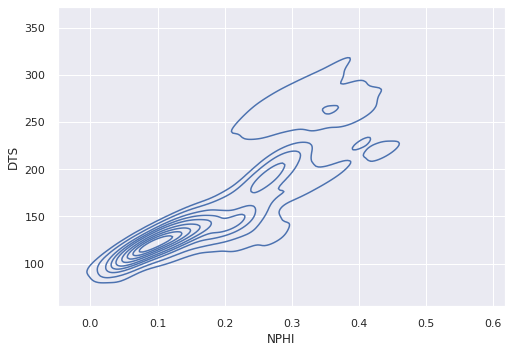

In [ ]:
# KDE plot
sns.kdeplot(x=well['NPHI'], y=well['DTS'])